# Machine Learning Project - Implemented on Python

    Students: Minh Hai NGUYEN - Cam Thanh Ha LE - Ayoub EL ARROUD EL HADARI - Paul Corbalan
    Supervisor: Mme. Béatrice LAURENT-BONNEAU 

# I. EXPLORATION

## I.1. Data Loading and Visualisation

First we load some useful libraries for data loading and data visualization in Python

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random
import os
from math import *

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import classification_report

In [2]:
def Load_DataSet(name, data_location = "data/"):
    return pd.read_csv(data_location + name + ".txt", sep = " ")

In [3]:
# Data loading
path = ""
data_location = "data/"
rain = Load_DataSet("rain_project", data_location = path + data_location)
# Let's take a look at the data
rain.head()

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
1,22092001_527,2017-06-11,3.945000,289.408750,285.277083,78.783333,246.750000,0.0,3.663785,244.299500,3.038503,1.416360,289.232315,285.170885,79.037785,2.328277,101672.850,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.375833,273.422500,81.700000,260.333333,1.2,3.328476,305.660752,2.463886,-1.898971,275.808688,273.672591,86.331598,10.675441,100583.760,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.869167,286.723333,87.620833,259.041667,0.2,3.232380,256.042392,2.963872,0.985627,289.627425,286.485126,82.301031,4.582309,101482.984,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.288750,280.215833,76.587500,216.541667,0.0,1.720926,139.297271,-0.260693,-1.397603,284.726139,280.367340,75.384116,0.940254,102223.586,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.527917,274.529167,81.391667,285.541667,1.6,4.424012,285.578800,3.940056,-1.457606,277.751699,274.590656,80.435085,13.903076,102416.220,0.0,no_rain


**Remark**:

In this database, we realise that the qualitative variables including "Id", "date", "rain_class". 

The other variables are considered quantitative including "ff","t", "td", "hu", "dd", "precip", "ws_arome", "p3031_arome", "u10_arome", "v10_arome", "t2m_arome", "d2m_arome", "r_arome", "tp_arome", "msl_arome", "rain"

## I.2. Data transformation

### Date to month

In [4]:
#Replace the column "date" into "month" to obtain the new data
from datetime import datetime, timedelta

rain["date"] = pd.to_datetime(rain["date"]).dt.month
rain = rain.rename(columns= {"date":"month"})

In [5]:
names = list(rain.columns)
num_var = names[2:-1]
qual_var = [names[i] for i in [0,1,-1]]

### Logarithm transformation ($\log(\cdot + 1)$)

In [6]:
rain_log = rain.copy()

rain_log["precip"] = np.log(rain_log["precip"] + 1)
rain_log["tp_arome"] = np.log(rain_log["tp_arome"] + 1)
rain_log["rain_log"] = np.log(rain_log["rain"] + 1)

rain_log.rename(columns = {'precip':'precip_log', 'tp_arome':'tp_arome_log'}, inplace = True)

num_var_log = num_var
num_var_log = list(map(lambda item: item.replace("precip","precip_log"), num_var_log))
num_var_log = list(map(lambda item: item.replace("tp_arome","tp_arome_log"), num_var_log))

qual_var_log = qual_var + ["rain_log"]

## I.3. Rain data set presentation

## Brief description of the data sets

In [7]:
print(rain.describe())

            month          ff           t          td          hu          dd  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     6.415698    4.082196  283.650528  281.080129   85.560841  206.575367   
std      3.455500    1.591358    4.943628    4.609328    8.490620   77.250928   
min      1.000000    1.158333  269.478333  267.113750   46.750000   32.916667   
25%      3.000000    2.869583  279.850208  277.645417   80.534375  158.739583   
50%      6.000000    3.858542  283.185000  281.176458   86.395833  222.812500   
75%      9.000000    4.970417  287.588333  284.725104   92.055208  260.677083   
max     12.000000   12.500000  299.517917  291.064583  100.000000  343.041667   

           precip    ws_arome  p3031_arome   u10_arome   v10_arome  \
count  688.000000  688.000000   688.000000  688.000000  688.000000   
mean     2.383721    3.719291   203.323936    1.158044    0.385976   
std      4.624367    1.516759    77.343712    2.344850    2.

In [8]:
print(rain_log.describe())

            month          ff           t          td          hu          dd  \
count  688.000000  688.000000  688.000000  688.000000  688.000000  688.000000   
mean     6.415698    4.082196  283.650528  281.080129   85.560841  206.575367   
std      3.455500    1.591358    4.943628    4.609328    8.490620   77.250928   
min      1.000000    1.158333  269.478333  267.113750   46.750000   32.916667   
25%      3.000000    2.869583  279.850208  277.645417   80.534375  158.739583   
50%      6.000000    3.858542  283.185000  281.176458   86.395833  222.812500   
75%      9.000000    4.970417  287.588333  284.725104   92.055208  260.677083   
max     12.000000   12.500000  299.517917  291.064583  100.000000  343.041667   

       precip_log    ws_arome  p3031_arome   u10_arome   v10_arome  \
count  688.000000  688.000000   688.000000  688.000000  688.000000   
mean     0.719286    3.719291   203.323936    1.158044    0.385976   
std      0.876752    1.516759    77.343712    2.344850    2.

### Qualitative variable
#### Histogram of `month` variable

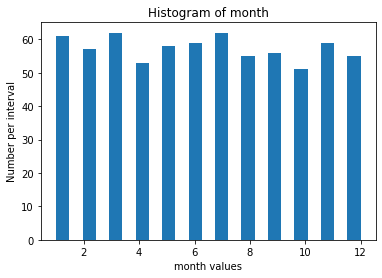

In [9]:
var = "month"

plt.figure()
plt.hist(rain[var], bins = 2*12-1)
plt.title("Histogram of "+var)
plt.xlabel(var+" values")
plt.ylabel("Number per interval")
plt.show()

### Quantitatives variables
#### Histograms

We will store the name of variables in `var_names` variables and quantitative variables, qualitatives variables as `num_var` and `qual_var` respectively

In [10]:
names = list(rain.columns)
num_var = names[2:-1]
qual_var = [names[i] for i in [0,1,-1]]

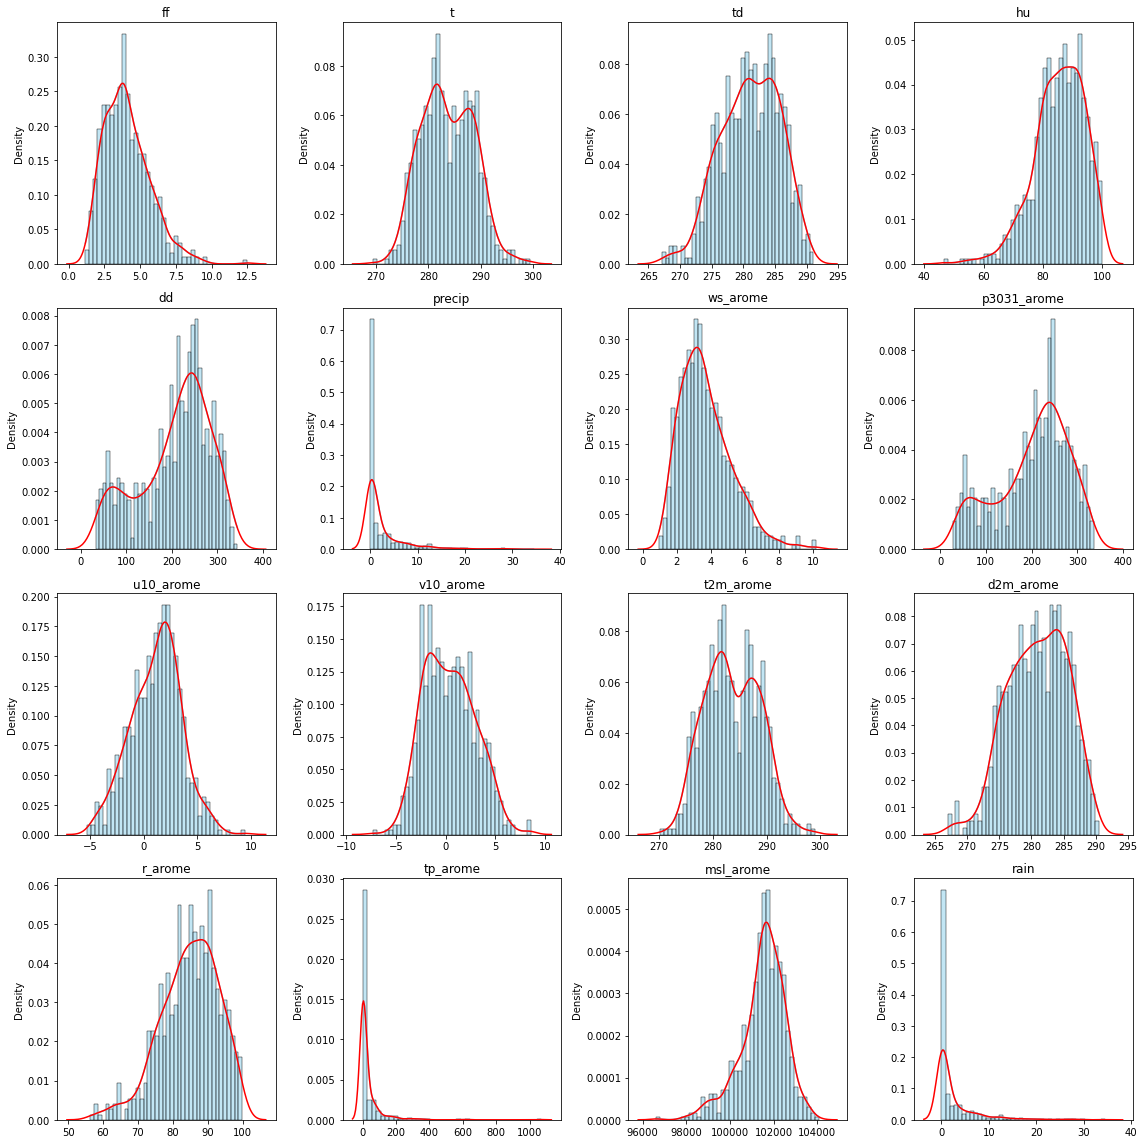

In [11]:
hist_fig, axs = plt.subplots(4,4,figsize=(16,16))
axs = axs.ravel()
for i in range(16):
    # sns.histplot(rain[num_var[i]], ax = axs[i])
    sns.histplot(data=rain[num_var[i]], stat='density', bins=40, kde=True, color="skyblue", ax=axs[i])
    sns.kdeplot(rain[num_var[i]], color='red', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_var[i])
plt.tight_layout()
# sns.histplot(rain['ff'])

#### Correlation between variables
##### Classical data set

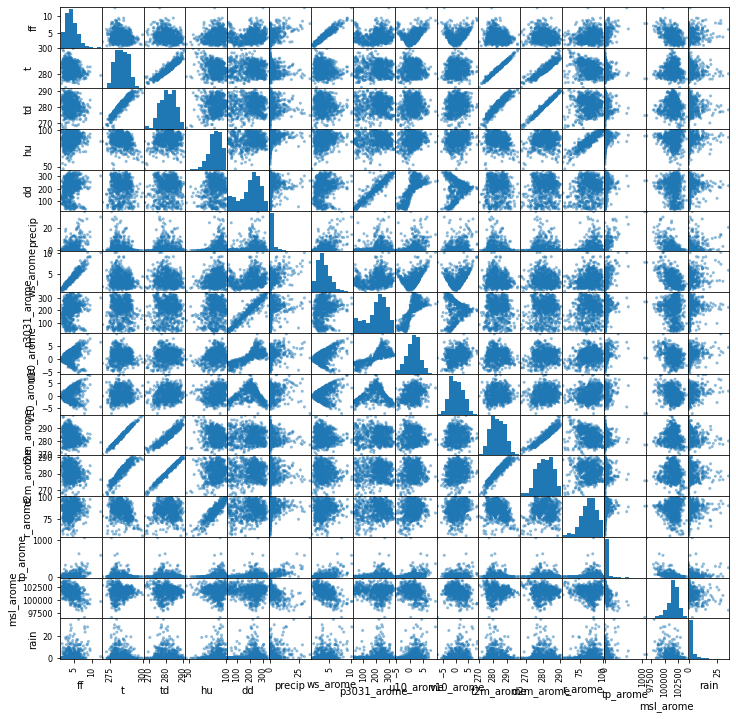

In [12]:
pd.plotting.scatter_matrix(rain[num_var], figsize=(12, 12))
plt.show()

[]

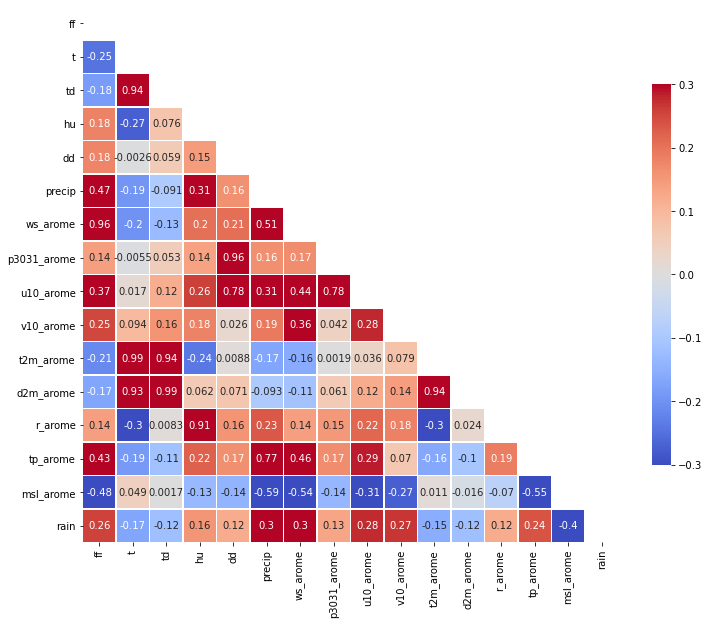

In [13]:
rain_corr = rain[num_var].corr()

mask = np.zeros_like(rain_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 14))
cmap= 'coolwarm'
sns.heatmap(rain_corr, mask=mask, cmap=cmap, annot=True, vmax=.3, vmin=-.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.plot()

##### Logarithmical data set

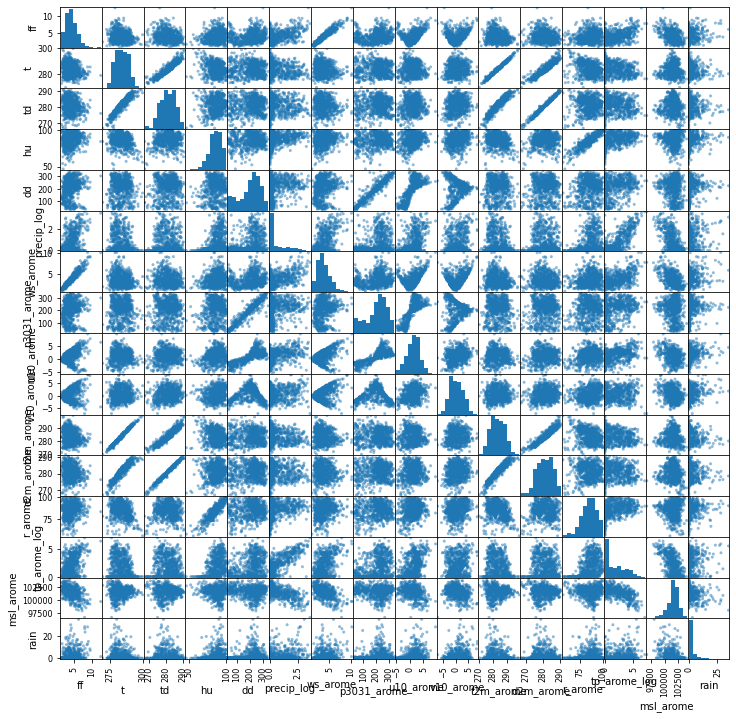

In [14]:
pd.plotting.scatter_matrix(rain_log[num_var_log], figsize=(12, 12))
plt.show()

[]

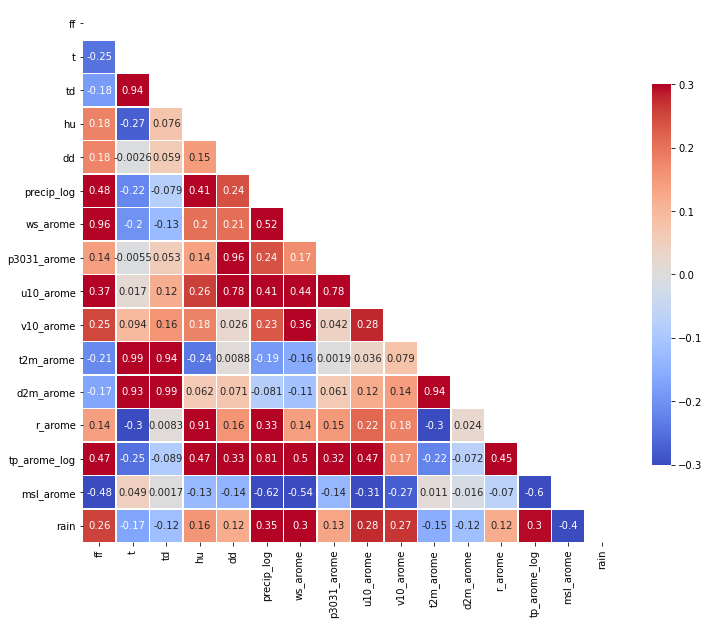

In [15]:
rain_log_corr = rain_log[num_var_log].corr()

mask = np.zeros_like(rain_log_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 14))
cmap= 'coolwarm'
sns.heatmap(rain_log_corr, mask=mask, cmap=cmap, annot=True, vmax=.3, vmin=-.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.plot()

## I.4. PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [17]:
num_var_in = num_var[:-1]

pcaR = PCA()
loadingR = pd.DataFrame(scale(rain[num_var_in]), columns = rain[num_var_in].columns)
pca_DataSet = pcaR.fit(loadingR).transform(loadingR)

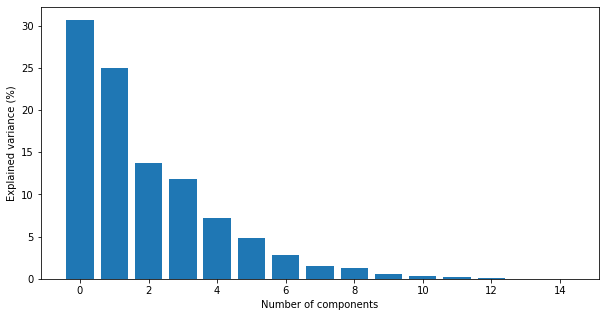

In [18]:
plt.figure(figsize = (10,5))
x = np.arange(pcaR.explained_variance_ratio_.size)
plt.bar(x, pcaR.explained_variance_ratio_*100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()

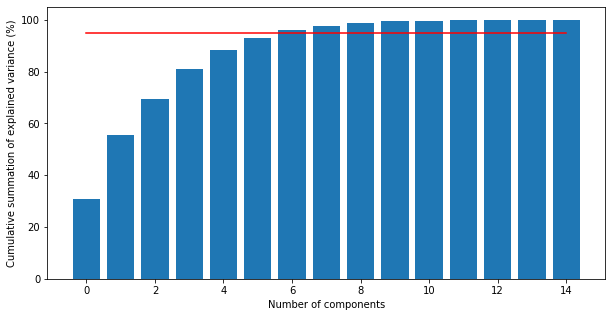

In [19]:
plt.figure(figsize = (10,5))
x = np.arange(pcaR.explained_variance_ratio_.size)
plt.bar(x, pcaR.explained_variance_ratio_.cumsum()*100)
plt.plot(x, np.zeros(x.shape)+95, color  ="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative summation of explained variance (%)')
plt.show()

In [20]:
nb_PCA_components = 6

In [21]:
pca_DataSet = pd.DataFrame(pca_DataSet)
pca_DataSet["rain_class"] = rain["rain_class"].astype("category")

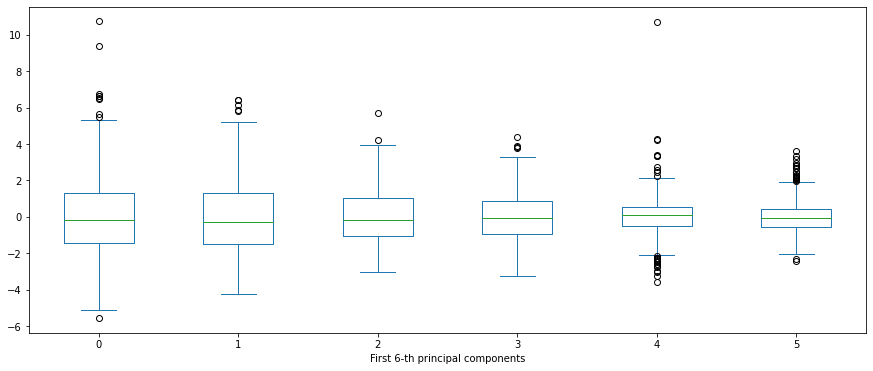

In [22]:
pca_DataSet.iloc[:,0:nb_PCA_components].plot(kind = "box", figsize = (15, 6) )
plt.xlabel('First %d-th principal components' % nb_PCA_components)
plt.show()

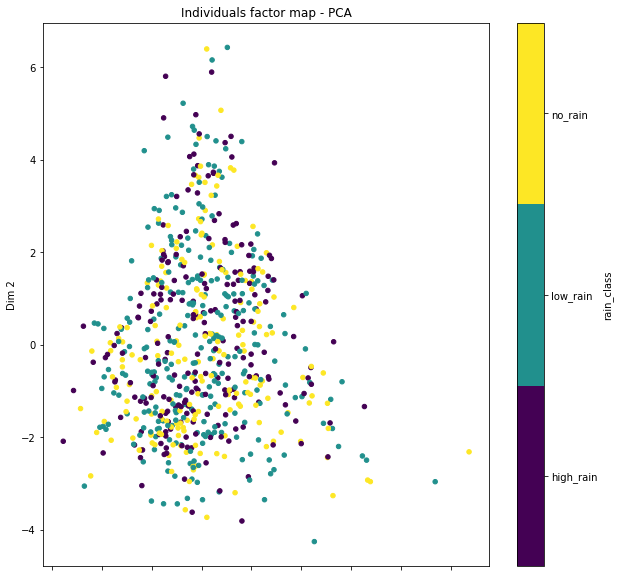

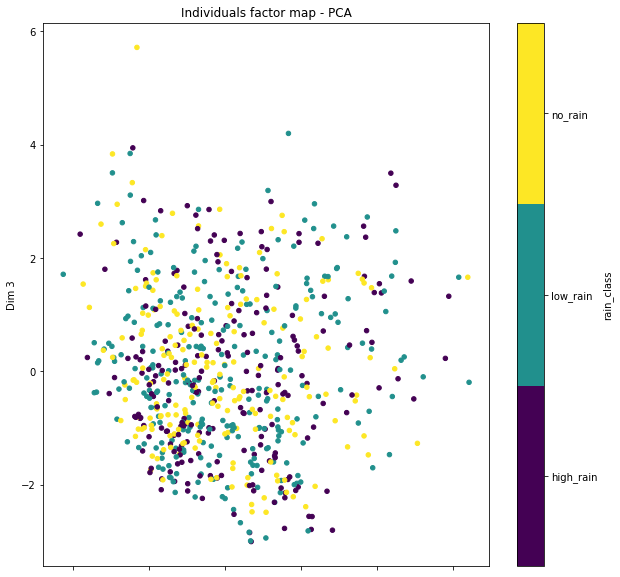

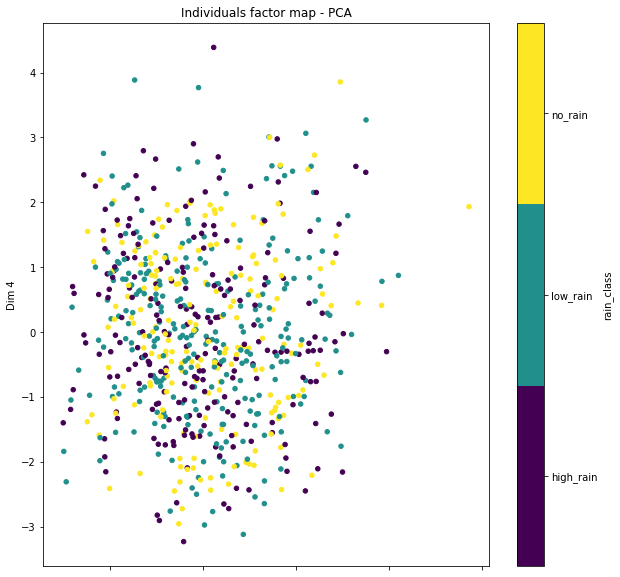

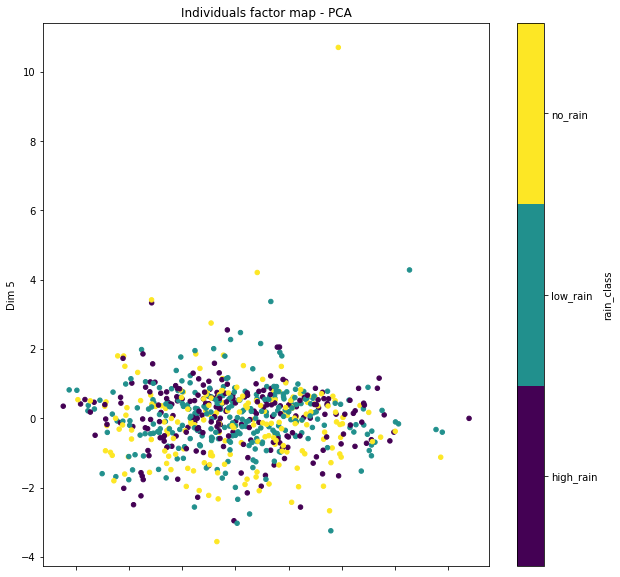

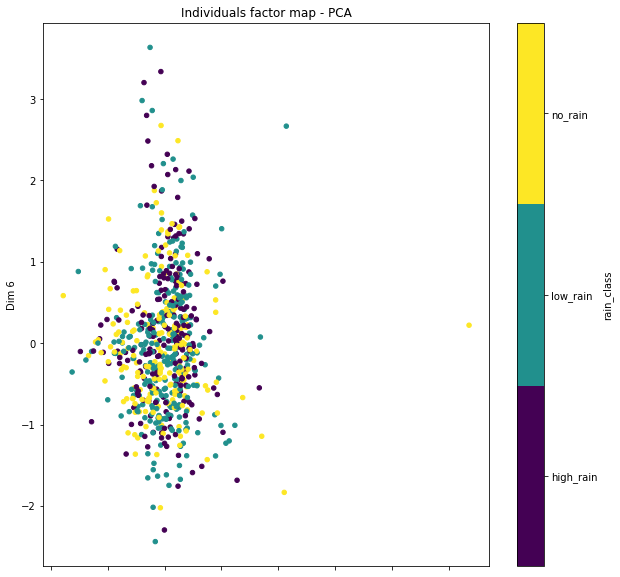

In [23]:
for dim in range(5):
    pca_DataSet.plot.scatter(x=dim, y=dim+1, c="rain_class", cmap="viridis", figsize = (10, 10))
    plt.xlabel("Dim "+str(dim+1))
    plt.ylabel("Dim "+str(dim+2))
    plt.title('Individuals factor map - PCA')
    plt.show()

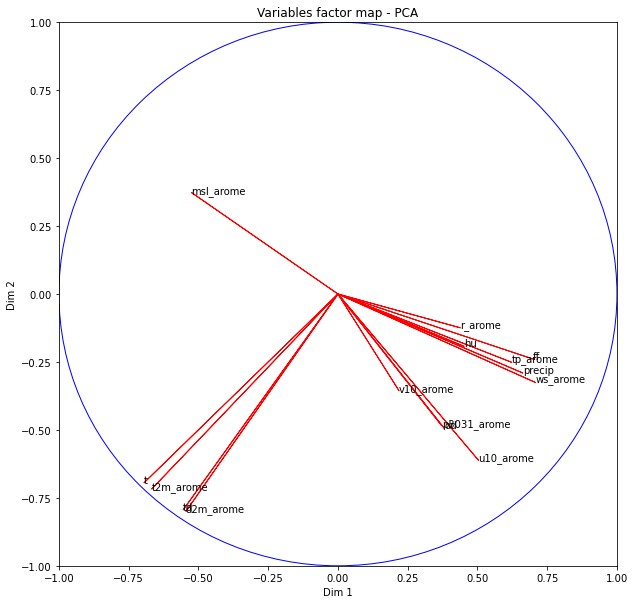

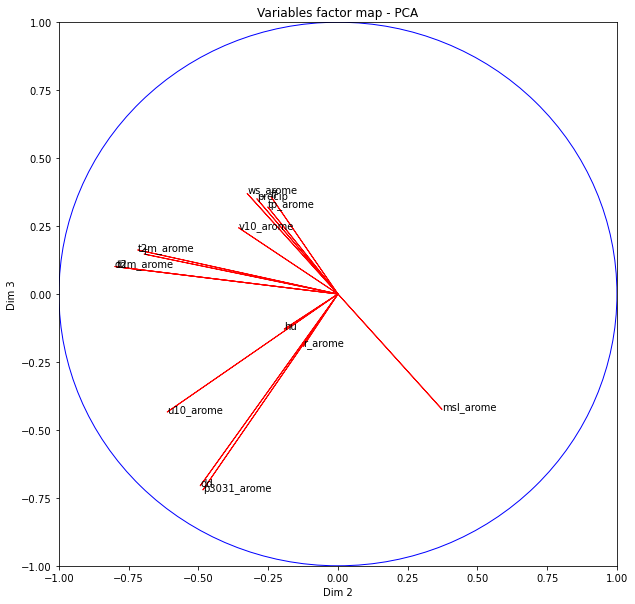

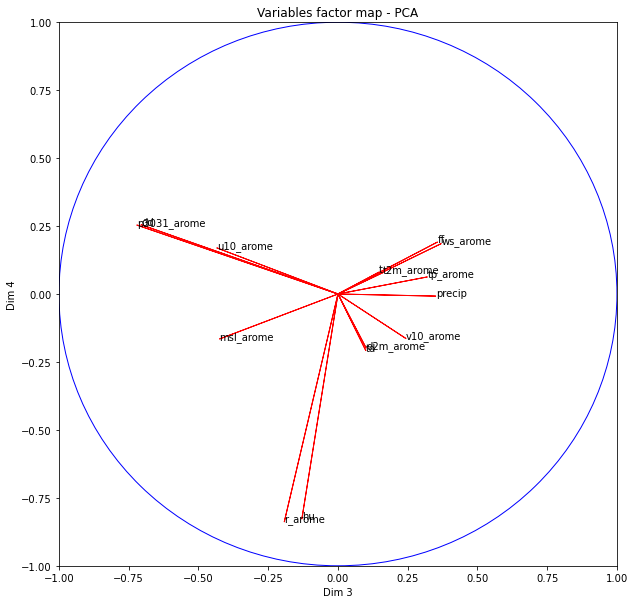

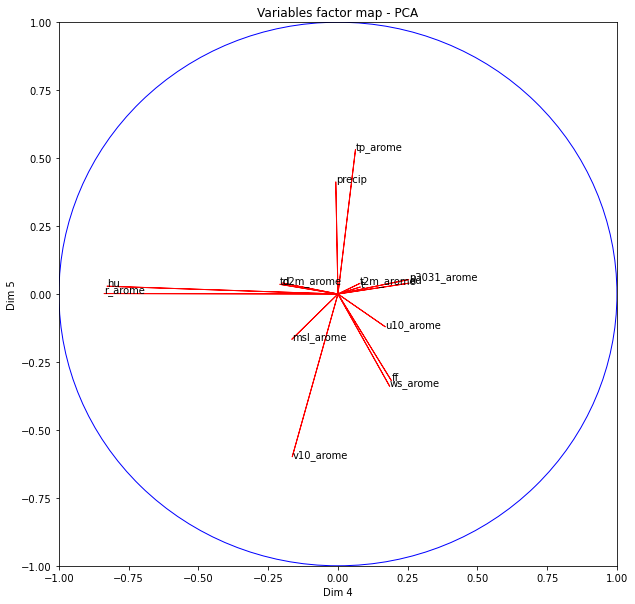

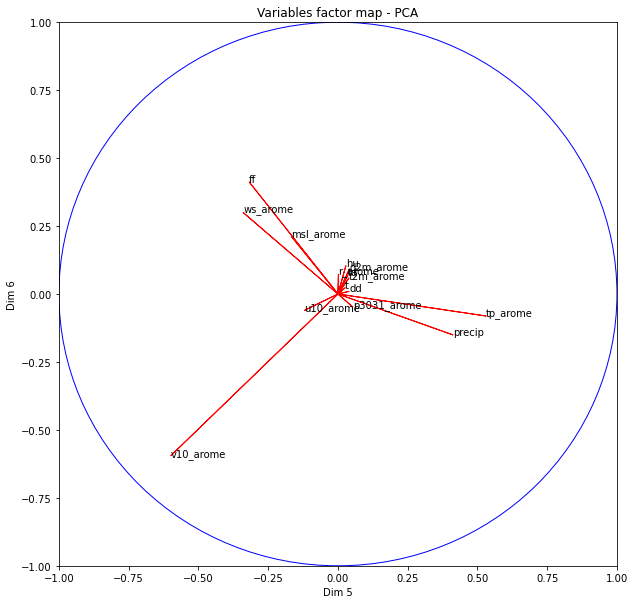

In [24]:
for dim in range(5):
    coord1 = pcaR.components_[dim] * np.sqrt(pcaR.explained_variance_[dim])
    coord2 = pcaR.components_[dim+1] * np.sqrt(pcaR.explained_variance_[dim+1])
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    for i, j, nom in zip(coord1, coord2, loadingR.columns):
        plt.text(i, j, nom)
        plt.arrow(0, 0, i, j, color = 'r', width = 0.0001)
    plt.axis((-1, 1, -1, 1))
    plt.xlabel("Dim "+str(dim+1))
    plt.ylabel("Dim "+str(dim+2))
    #Cercle
    c = plt.Circle((0, 0), radius = 1, color = 'b', fill = False)
    ax.add_patch(c)
    plt.title('Variables factor map - PCA')
    plt.show()

### Spliting the data into a training set and a test set

For simple comparison purpose, we decide to use the same extraction in both Python and R

In [25]:
train_set = pd.read_csv("data/train_set.txt",sep = ' ')
test_set = pd.read_csv("data/test_set.txt",sep = ' ')

In [26]:
X_train = pd.DataFrame(train_set).copy()
del X_train['rain']
del X_train['rain_class']
del X_train['rain_log']

X_test = pd.DataFrame(test_set).copy()
del X_test['rain']
del X_test['rain_class']
del X_test['rain_log']
train_set['rain_class'] = train_set['rain_class'].astype("category")
test_set['rain_class'] = test_set['rain_class'].astype("category")
Y_train = train_set['rain']
Y_train_log = train_set['rain_log']

Y_test = test_set['rain']
Y_test_log = test_set['rain_log']
Y_train_class = train_set['rain_class']
Y_test_class = test_set['rain_class']


In [80]:
Y_train_class.value_counts() + Y_test_class.value_counts()

low_rain     292
no_rain      208
high_rain    188
Name: rain_class, dtype: int64

In [84]:
(Y_train_class.value_counts() + Y_test_class.value_counts()) / 688

low_rain     0.424419
no_rain      0.302326
high_rain    0.273256
Name: rain_class, dtype: float64

In [85]:
Y_train_class.count()

550

# II. CLASSIFICATION

In [27]:
def seed_everything(seed=42):
    """"Seed everything.
    """   
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [28]:
seed_everything()

In [29]:
def classification_metric(y_true, y_pred):
    # labs = ["high_rain", "low_rain", "no_rain"]
    # f1 = np.round(f1_score(y_true, y_pred, labels = labs, average = "macro"), 3)
    # class_recall = np.round(recall_score(y_true, y_pred, labels = labs, average = None), 3)
    # total_recall = np.round(recall_score(y_true, y_pred, labels = labs, average = "macro"), 3)
    # acc = np.round(accuracy_score(y_true, y_pred), 3)
    # precision = np.round(precision_score(y_true, y_pred, labels = labs, average = None), 3)
    print("Confusion matrix : ")
    table = pd.crosstab(y_true, y_pred, dropna = False)
    print(table)
    print(classification_report(y_true, y_pred))
    # table.columns = table.columns.astype(str)
    # table["recall"] = class_recall[:len(table.index)]
    # table["precision"] = precision[:len(table.index)]
    # print("The confusion matrix ")
    # print(table)
    # print("The prediction accuracy: ", acc)
    # print("The f1-score : ", f1)
    # print("The recall-score : ", total_recall)


## II.1. K nearest neighbors

The completeness parameter `k` is optimised on a predefined grid by minimising the estimated error by cross-validation; scikit-learn offers many cross-validation options. 

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Optimisation of k
param_grid = [{"n_neighbors": list(range(1, 20))}]
knn = GridSearchCV(KNeighborsClassifier(weights = "distance"), scoring = "accuracy", param_grid = param_grid, cv=10, n_jobs=-1, refit = True)
knnOpt = knn.fit(X_train, Y_train_class)  
# optimal parameter
# knnOpt.best_params_["n_neighbors"]
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (knnOpt.best_score_, knnOpt.best_params_))

Best Mean cross-validated accuracy = 0.540000, Best parameter = {'n_neighbors': 18}


The prediction accuracy in the test set

In [31]:
# Estimation of the prediction accuracy on the test sample
print("Prediction accuracy in the test sample : ", knnOpt.score(X_test, Y_test_class))


Prediction accuracy in the test sample :  0.5072463768115942


In [32]:
# Prediction of the test sample
y_hat_class = knnOpt.predict(X_test)
classification_metric(Y_test_class, y_hat_class)
# print("Accuracy score =", accuracy_score(y_true = Y_test_class, y_pred = y_hat_class))

# # confusion matrix
# table = pd.crosstab(y_hat_class, Y_test_class)
# print("Confusion matrix")
# print(table)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          20        12        1
low_rain           11        37       10
no_rain            11        23       13
              precision    recall  f1-score   support

   high_rain       0.48      0.61      0.53        33
    low_rain       0.51      0.64      0.57        58
     no_rain       0.54      0.28      0.37        47

    accuracy                           0.51       138
   macro avg       0.51      0.51      0.49       138
weighted avg       0.51      0.51      0.49       138



## II.2. Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation of shaft depth
param_grid = [{"max_depth": range(2,10), "min_samples_split" : range(2,10), "min_samples_leaf": range(1,5) }]
tree = GridSearchCV(DecisionTreeClassifier(max_features = 'auto', min_impurity_decrease = 1e-3, random_state = 42), scoring = "accuracy", param_grid = param_grid, cv=10, n_jobs=-1, refit = True)
treeOpt = tree.fit(X_train, Y_train_class)
# Optimal parameter
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (treeOpt.best_score_, treeOpt.best_params_))

Best Mean cross-validated accuracy = 0.512727, Best parameter = {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [34]:
# Estimation of the prediction error on the test sample
treeOpt.score(X_test, Y_test_class)

0.4855072463768116

In [35]:
# Prediction of the test sample
y_hat_class = treeOpt.predict(X_test)
classification_metric(Y_test_class, y_hat_class)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          14        17        2
low_rain            6        39       13
no_rain             4        29       14
              precision    recall  f1-score   support

   high_rain       0.58      0.42      0.49        33
    low_rain       0.46      0.67      0.55        58
     no_rain       0.48      0.30      0.37        47

    accuracy                           0.49       138
   macro avg       0.51      0.46      0.47       138
weighted avg       0.50      0.49      0.47       138



    The `low_rain` class seems to be difficult to predict!

## II.3. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier 
# Parameters' definitions
forest = RandomForestClassifier(n_estimators = 500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# Training
rfFit = forest.fit(X_train,Y_train_class)
# Out-of-bag error on the train sample
print(1 - rfFit.oob_score_)
# Out-of-bag error on the test sample
print(1 - rfFit.score(X_test,Y_test_class))

0.4545454545454546
0.5144927536231885


Hyper parameters tunning by cross validation

In [37]:
param = [{"n_estimators" : range(200, 500, 100) , "max_features": range(2,5), "max_depth" : range(10, 20, 2) }]
rf = GridSearchCV(RandomForestClassifier(random_state=42, criterion="entropy"),
        param, cv = 5, n_jobs=-1)
rfOpt = rf.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (rfOpt.best_score_, rfOpt.best_params_))

Best Mean cross-validated accuracy = 0.545455, Best parameter = {'max_depth': 12, 'max_features': 4, 'n_estimators': 300}


In [58]:
# Prediction of the test sample
y_pred_test = rfOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          20        12        1
low_rain           12        35       11
no_rain            10        22       15
              precision    recall  f1-score   support

   high_rain       0.48      0.61      0.53        33
    low_rain       0.51      0.60      0.55        58
     no_rain       0.56      0.32      0.41        47

    accuracy                           0.51       138
   macro avg       0.51      0.51      0.50       138
weighted avg       0.52      0.51      0.50       138



In [73]:
Y_rain

NameError: name 'Y_rain' is not defined

In [62]:
forest_opt = RandomForestClassifier(**rfOpt.best_params_)
forest_opt.fit(X_train, Y_train_class)

y_pred_test = forest_opt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          20        12        1
low_rain           12        35       11
no_rain            10        24       13
              precision    recall  f1-score   support

   high_rain       0.48      0.61      0.53        33
    low_rain       0.49      0.60      0.54        58
     no_rain       0.52      0.28      0.36        47

    accuracy                           0.49       138
   macro avg       0.50      0.50      0.48       138
weighted avg       0.50      0.49      0.48       138



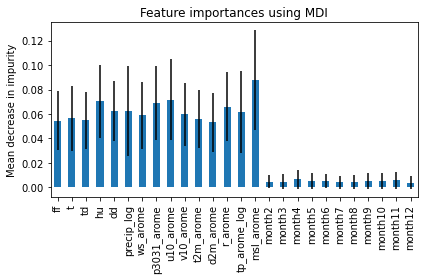

In [71]:
importances = forest_opt.feature_importances_
feature_names = X_train.columns
std = np.std([tree.feature_importances_ for tree in forest_opt.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig("./Images/feature_importance_mdi_forest.pdf")

### Gradient Boosting applying to Random Forest

In [39]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score

In [40]:
# from xgboost import XGBRFClassifier

In [41]:
# define the model
# model = XGBRFClassifier(n_estimators = 500, subsample = 0.99, random_state = 42, metric = "accuracy", n_jobs = -1)

In [42]:
# # define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(model, X_train, Y_train_class, scoring='accuracy', cv = cv, n_jobs=-1)
# # report performance
# print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [43]:
# model.fit(X_train, Y_train_class)
# y_pred_test = model.predict(X_test)

# classification_metric(Y_test_class, y_pred_test)

## II.4. Support Vector Machine

### II.4.1. Linear SVM 

Optimisation of C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty

In [44]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param=[{"C": np.linspace(0.01, 0.1, 10) }]
svm= GridSearchCV(LinearSVC(), param, cv=10, n_jobs = -1, scoring = "accuracy")
svmLinOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmLinOpt.best_score_,svmLinOpt.best_params_))

Best Mean cross-validated accuracy = 0.547273, Best parameter = {'C': 0.06000000000000001}


In [45]:
(Y_test_class == 'no_rain').sum()

47

In [46]:
# Prediction of the test sample
y_pred_test = svmLinOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          25         7        1
low_rain           11        36       11
no_rain             9        20       18
              precision    recall  f1-score   support

   high_rain       0.56      0.76      0.64        33
    low_rain       0.57      0.62      0.60        58
     no_rain       0.60      0.38      0.47        47

    accuracy                           0.57       138
   macro avg       0.58      0.59      0.57       138
weighted avg       0.58      0.57      0.56       138



    It seems that with the linear kernel, the results is quite good comparing to other methods

### II.4.2. SVM with polynomial kernels

By default, we take polynomial of degree 3

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param = [{"C":np.linspace(0.75,1.25,10),"gamma":np.linspace(0.01, 0.1, 10) , "coef0": np.linspace(0, 3, 5) }]
svm = GridSearchCV(SVC(kernel="poly"),param,cv=10,n_jobs=-1, scoring = "accuracy")
svmPolyOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmPolyOpt.best_score_, svmPolyOpt.best_params_))

Best Mean cross-validated accuracy = 0.549091, Best parameter = {'C': 0.8055555555555556, 'coef0': 2.25, 'gamma': 0.030000000000000006}


In [48]:
# Prediction of the test sample
y_pred_test = svmPolyOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          20        12        1
low_rain           11        36       11
no_rain             8        26       13
              precision    recall  f1-score   support

   high_rain       0.51      0.61      0.56        33
    low_rain       0.49      0.62      0.55        58
     no_rain       0.52      0.28      0.36        47

    accuracy                           0.50       138
   macro avg       0.51      0.50      0.49       138
weighted avg       0.50      0.50      0.49       138



Let's test for degree 2

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C" : np.linspace(0.75,1.25,10),"gamma":np.linspace(0.01, 0.1, 10), "coef0":np.linspace(0, 3, 5) }]
svm= GridSearchCV(SVC(kernel="poly",degree =2),param,cv=10,n_jobs=-1,scoring = "accuracy")
svmPoly2Opt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmPoly2Opt.best_score_,svmPoly2Opt.best_params_))

Best Mean cross-validated accuracy = 0.545455, Best parameter = {'C': 0.8055555555555556, 'coef0': 1.5, 'gamma': 0.08}


In [50]:
# Prediction of the test sample
y_pred_test= svmPoly2Opt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          20        12        1
low_rain           11        35       12
no_rain             6        27       14
              precision    recall  f1-score   support

   high_rain       0.54      0.61      0.57        33
    low_rain       0.47      0.60      0.53        58
     no_rain       0.52      0.30      0.38        47

    accuracy                           0.50       138
   macro avg       0.51      0.50      0.49       138
weighted avg       0.50      0.50      0.49       138



### II.4.3. SVM with radial kernel

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C" : np.linspace(1,1.25,10),"gamma":np.linspace(0.05, 0.15, 10)}]
svm= GridSearchCV(SVC(kernel="rbf"), param, cv=10, n_jobs=-1,scoring = "accuracy")
svmRadOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmRadOpt.best_score_,svmRadOpt.best_params_))

Best Mean cross-validated accuracy = 0.565455, Best parameter = {'C': 1.25, 'gamma': 0.09444444444444444}


In [52]:
# Prediction of the test sample
y_pred_test = svmRadOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          21        11        1
low_rain           10        39        9
no_rain            10        26       11
              precision    recall  f1-score   support

   high_rain       0.51      0.64      0.57        33
    low_rain       0.51      0.67      0.58        58
     no_rain       0.52      0.23      0.32        47

    accuracy                           0.51       138
   macro avg       0.52      0.51      0.49       138
weighted avg       0.52      0.51      0.49       138



### II.4.3. SVM with sigmoid kernel

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.1,0.4,0.5,0.6,0.8,1,1.2,1.4,1.6,2],"gamma":np.array(range(1,11))/100, "coef0":np.array(range(1,11))/10}]
svm= GridSearchCV(SVC(kernel="sigmoid"),param,cv=10,n_jobs=-1,scoring = "accuracy")
svmSigOpt=svm.fit(X_train, Y_train_class)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svmSigOpt.best_score_,svmSigOpt.best_params_))

Best Mean cross-validated accuracy = 0.516364, Best parameter = {'C': 0.4, 'coef0': 0.1, 'gamma': 0.05}


In [54]:
# Prediction of the test sample
y_pred_test = svmSigOpt.predict(X_test)
classification_metric(Y_test_class, y_pred_test)

Confusion matrix : 
col_0       high_rain  low_rain  no_rain
rain_class                              
high_rain          26         7        0
low_rain           12        42        4
no_rain             8        35        4
              precision    recall  f1-score   support

   high_rain       0.57      0.79      0.66        33
    low_rain       0.50      0.72      0.59        58
     no_rain       0.50      0.09      0.15        47

    accuracy                           0.52       138
   macro avg       0.52      0.53      0.47       138
weighted avg       0.52      0.52      0.46       138



## II.5. Neural network

### II.5.1. Multi-layer Perceptron Classifier

In [55]:
from sklearn.neural_network import MLPClassifier

#### One hidden layer neural network

Firstly, we fit an one-hidden layer neural network with ReLU activation in the hidden layer and the softmax activation for the out put layer, and the log-loss function. We use here the default configuration for the optimisation task.

In [56]:
nnet1 = MLPClassifier(hidden_layer_sizes = (3), random_state = 42, max_iter = 1500)
nnet1.fit(X_train, Y_train_class)

MLPClassifier(hidden_layer_sizes=3, max_iter=1500, random_state=42)

In [57]:
nnet1.

SyntaxError: invalid syntax (<ipython-input-57-626a66f717d8>, line 1)

In [ ]:
plt.plot(nnet1.loss_curve_)

Training accuracy

In [ ]:
y_pred = nnet1.predict(X_train)

classification_metric(Y_train_class, y_pred)

Test accuracy

In [ ]:
y_pred_test = nnet1.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

    Since the training accuracy is low, we can not expect that the test accuracy is good. It means that this model does fit with the data or the optimisation process did not minimize the loss function since it stopped around 500 iterations

We'll use cross validation for searching the optimal number of neurones in the hidden layer and the learning rate for optimisation process

In [ ]:
param_grid = [{"hidden_layer_sizes" : [(3,),(4,),(5,),(6,), (7,)], "early_stopping" : [True, False], "alpha" : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]}]

nnet1_cv = GridSearchCV(MLPClassifier(max_iter = 1500, random_state = 42), param_grid, cv = 5, n_jobs=-1, return_train_score = True)
nnet1_cv.fit(X_train, Y_train_class)

print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (nnet1_cv.best_score_, nnet1_cv.best_params_))

In [ ]:
y_pred = nnet1_cv.predict(X_train)

classification_metric(Y_train_class, y_pred)

In [ ]:
y_pred_test = nnet1_cv.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

We can see that the loss function is almost reached the minimum but the prediction accuracy is still arounded $50$ percents. It means that this model does not fit well the data. We will try with more sophisticated models in the next sections

### Multilayers Neural Network

    Remark that if we just fit a sophisticated model with many parameters (weights and biases), we can get very high performance on the training set. But unfortunately, we can get a worse performance on the test set
    and the generalization of the model is very bad. This is the **overfitting** phenomenon

In [ ]:
nnet_of = MLPClassifier(hidden_layer_sizes = (20, 25 , 15, 15, 10, 5), random_state = 42, max_iter = 1500, alpha = 0.1, activation = "relu", early_stopping = False, n_iter_no_change = 75)
nnet_of.fit(X_train, Y_train_class)


In [ ]:
print("Training accuracy : ", nnet_of.score(X_train, Y_train_class))
plt.figure(figsize=(6,4))
plt.plot(nnet_of.loss_curve_)
plt.title("Loss curve during training")
plt.xlabel("Iteration")
plt.tight_layout()
plt.savefig("loss_nn_overfit.pdf")

In [ ]:
y_pred_test = nnet_of.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

We try here to find a Neural Network which can generalize the data 

In [ ]:
nnet = MLPClassifier(hidden_layer_sizes = (15, 10, 10, 8, 8, 5), random_state = 42, max_iter = 1500, alpha = 0.1, activation = "tanh", early_stopping = True, n_iter_no_change = 500)
nnet.fit(X_train, Y_train_class)

print("Training accuracy : ", nnet.score(X_train, Y_train_class))
plt.plot(nnet.loss_curve_)
plt.title("Loss curve during training")
plt.xlabel("Iteration")
plt.show()
y_pred_test = nnet.predict(X_test)

classification_metric(Y_test_class, y_pred_test)

15, 15, 10, 5: 0.529

15, 15, 8, 8, 5, tanh : 0.536

15, 10, 10, 8, 8, 5, tanh: 0.565

## II.6. Gaussian Process Classification

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern


In [ ]:
GPC = GaussianProcessClassifier(kernel = 0.5*RBF(3.0), random_state = 42, multi_class = "one_vs_rest")
GPC.fit(X_train, Y_train_class)
print(GPC.score(X_train, Y_train_class))
print(GPC.score(X_test, Y_test_class))

In [ ]:
GPC = GaussianProcessClassifier(kernel = Matern(3.0, nu = 1.5), random_state = 42, multi_class = "one_vs_rest")
GPC.fit(X_train, Y_train_class)
print(GPC.score(X_train, Y_train_class))
print(GPC.score(X_test, Y_test_class))

# III.REGRESSION AND REGRESSION FOR CLASSIFICATION USING THRESHOLDS

Metrics used in regression problem: MSE, MAPE et R2-Score

In [ ]:
def regression_metric(y_true, y_pred):
    mape = MAPE(y_true, y_pred)
    mse = MSE(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = MAE(y_true, y_pred)

    print("Mean squared error : ", np.round(mse, 2))
    print("Mean absolute error : ", np.round(mae, 2))
    print("Mean absolute percentage error : ", np.round(mape, 2))
    print("R2 - Score : ", np.round(r2, 2))

In [ ]:
def to_class(rain, eps = 1e-3):
    myrain = (rain <= eps)*0 + (rain > eps)*(rain <= 2 )*1 + (rain > 2)*2
    myrain2 = myrain.astype('<U9')

    myrain2[myrain == 0] = 'no_rain'
    myrain2[myrain == 1] = 'low_rain'
    myrain2[myrain == 2] = 'high_rain'
    return myrain2

## III.1. Linear regression without penalisation and without variable selection

### III.1.1. With `rain`

In [ ]:
from sklearn.linear_model import LinearRegression
regLin = LinearRegression().fit(X_train, Y_train)
y_pred = regLin.predict(X_test)

regression_metric(Y_test, y_pred)

We can evaluate the prediction accuracy for classification by comparing the results into class with `rain_class`

In [ ]:
y_pred_class = to_class(y_pred)

classification_metric(Y_test_class,y_pred_class)

### III.1.2. With `rain_log`

In [ ]:
regLinLog = LinearRegression().fit(X_train, Y_train_log)

prevLog = regLinLog.predict(X_test)
prev = np.exp(prevLog) - 1

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

By using `rain_log`, the value of MSE is reduced

## III.2. Penalized regression 

### III.2.1. Penalisation Lasso

#### III.2.1.1. With `rain`

We implement the Lasso regression with the default values

In [ ]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(X_train, Y_train)
prev = regLasso.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

The penalisation parameter is optimized by the cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
param = [{"alpha":np.linspace(0, 2, 200)}]
regLasso = GridSearchCV(linear_model.Lasso(), param_grid = param, scoring = "r2", cv = 5,n_jobs=-1)
regLassOpt = regLasso.fit(X_train, Y_train)
# Optimal parameter
regLassOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regLassOpt.best_score_, regLassOpt.best_params_))

Let's do some previsions with the optimized value of `lambda`

In [ ]:
prev = regLassOpt.predict(X_test)
regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

In [ ]:
plt.plot(prev, Y_test,"o")
plt.xlabel("Rain predicted")
plt.ylabel("Rain observed")
plt.show()

In [ ]:
plt.plot(prev,Y_test - prev,"o")
plt.xlabel(u"Predicted")
plt.ylabel(u"Residus")
plt.hlines(0,-1,9)
plt.show()

In [ ]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)
model_lasso.coef_

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso retain " + str(sum(coef != 0)) + 
      " variables and delete " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Lasso model coefficients")

In [ ]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, alphas=np.array(range(1,200,1))/200.,n_jobs=-1,random_state=42).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Mean of MSE', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimised by VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE of each validation: coordinate descent ')
plt.show()

In [ ]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train,Y_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

#### III.2.1.2. With `rain_log`

In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{"alpha": np.linspace(0, 2 , 200) }]

regLasso = GridSearchCV(linear_model.Lasso(), param_grid = param, scoring = "r2",cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train_log)
# optimal parameter 
regLassOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
prevLog = regLassOpt.predict(X_test)
prev = np.exp(prevLog) -1

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

### III.2.2. Penalisation Ridge

We implement the Ridge regression with the default values

In [ ]:
from sklearn.linear_model import Ridge
regRidge = Ridge()
regRidge.fit(X_train, Y_train)
prev = regRidge.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

The penalisation parameter is optimized by the cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{"alpha" : np.linspace(0, 1, 200)}]
regRidge = GridSearchCV(Ridge(),param_grid = param, scoring = "r2",cv=10,n_jobs=-1)
regRidOpt=regRidge.fit(X_train, Y_train)
# optimal parameter
regRidOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regRidOpt.best_score_,regRidOpt.best_params_))

Let's do some previsions with the optimized value of `lambda`

In [ ]:
prev = regRidOpt.predict(X_test)
regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

In [ ]:
# Coefficients
regRidge=linear_model.Ridge(alpha=regRidOpt.best_params_['alpha'])
model_ridge=regRidge.fit(X_train,Y_train)
model_ridge.coef_

In [ ]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
print("Ridge retains " + str(sum(coef != 0)) + 
      " variables and deletes " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Ridge model coefficients")

With `rain_log`

In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{"alpha":np.linspace(0,100,200)}]
regRidge = GridSearchCV(Ridge(), param,cv=5,n_jobs=-1)
regRidOpt=regRidge.fit(X_train, Yr_log_train)
# optimal parameter
regRidOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regRidOpt.best_score_,regRidOpt.best_params_))

In [ ]:
prevLog=regRidOpt.predict(X_test)
prev = np.exp(prevLog) -1
print("MSE=",mean_squared_error(prev,Yr_test))
print("R2=",r2_score(Yr_test,prev))

prev_class = to_class(prev)
print("Accuracy score =", accuracy_score(Yb_test.to_list(), prev_class))

In [ ]:
# Coefficients
regRidge=linear_model.Ridge(alpha=regRidOpt.best_params_['alpha'])
model_ridge=regRidge.fit(X_train,Yr_train)
model_ridge.coef_

### III.2.3. Penalisation Elastic

In [ ]:
from sklearn.linear_model import ElasticNet
regElastic = ElasticNet()
regElastic.fit(X_train,Y_train)
prev = regElastic.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{"alpha":np.linspace(0,2,200)}]
regElastic = GridSearchCV(ElasticNet(), param, cv=5,n_jobs=-1)
regElasOpt=regElastic.fit(X_train, Y_train)
# optimal parameter
regElasOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regElasOpt.best_score_, regElasOpt.best_params_))

Let's do some previsions with the optimized value of `lambda`

In [ ]:
prev=regElasOpt.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))


In [ ]:
# Coefficients
regElastic=linear_model.ElasticNet(alpha=regElasOpt.best_params_['alpha'])
model_elastic=regElastic.fit(X_train,Y_train)
model_elastic.coef_

In [ ]:
coef = pd.Series(model_elastic.coef_, index = X_train.columns)
print("Elastic retains " + str(sum(coef != 0)) + 
      " variables and deletes " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Elastic model coefficients")

In [ ]:
# Coefficients
regRidge=linear_model.Ridge(alpha=regRidOpt.best_params_['alpha'])
model_ridge=regRidge.fit(X_train,Yr_train)
model_ridge.coef_

## III.3. Generalized Linear Models (GLM)

### III.3.1. Poisson Regression 

#### With `rain`

In [ ]:
from sklearn.linear_model import PoissonRegressor
regPoisson = PoissonRegressor(alpha = 0, max_iter = 300)
regPoisson.fit(X_train, Y_train)
prev = regPoisson.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))


### III.3.2. Poisson Regression with penalty 

In [ ]:
from sklearn.model_selection import GridSearchCV
param = [{"alpha":np.linspace(0,2,200)}]
regPoisson_l2 = GridSearchCV(PoissonRegressor(), param,cv=5,n_jobs=-1)
regPoiOpt_l2 = regPoisson_l2.fit(X_train, Y_train)
# optimal parameter
regPoiOpt_l2.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regPoiOpt_l2.best_score_,regPoiOpt_l2.best_params_))

In [ ]:
prev = regPoiOpt_l2.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(np.array(Y_test_class), to_class(prev))

### III.3.3. Gamma Regression

In [ ]:
from sklearn.linear_model import GammaRegressor

In [ ]:
param = {"alpha" : np.linspace(0.1, 1, 15)}
gamma_reg_cv = GridSearchCV(GammaRegressor(max_iter=300), param_grid = param, cv = 10, n_jobs = -1)
gamma_reg = gamma_reg_cv.fit(X_train, Y_train + 1e-5)

print("The best parameter is ", gamma_reg_cv.best_params_)

y_pred = gamma_reg.predict(X_test)

regression_metric(Y_test, y_pred)
classification_metric(Y_test_class, to_class(y_pred))

### III.3.4. Tweedie Regression

In [ ]:
from sklearn.linear_model import TweedieRegressor

In [ ]:
param = {"power" : [0, 1, 1.5, 1.6, 1.7, 1.8, 2, 2.5, 3, 4], "alpha" : np.linspace(0.1, 1, 10)}
tw_cv = GridSearchCV(TweedieRegressor(link = "log", max_iter = 300), param_grid= param, cv = 10, n_jobs = -1, scoring = "neg_mean_absolute_error")
tw = tw_cv.fit(X_train, Y_train)
print("The best parameter is ", tw_cv.best_params_)
print("The best score is ", tw_cv.best_score_ )
y_pred = tw.predict(X_test)

regression_metric(Y_test, y_pred)
classification_metric(Y_test_class, to_class(y_pred))
classification_metric(Y_test_class, to_class(y_pred, eps = 0.5))

## III.4. SVM Regression

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
param = [{"C": np.linspace(0.01, 1, 200) }]
svr = GridSearchCV(LinearSVR(), param, cv=10, n_jobs = -1, scoring = "neg_mean_absolute_error")
svrLinOpt = svr.fit(X_train, Y_train)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (svrLinOpt.best_score_, svrLinOpt.best_params_))

In [ ]:
prev = svrLinOpt.predict(X_test)

regression_metric(Y_test, prev)
classification_metric(Y_test_class, to_class(prev))

## III.5. Comparison of the performance 

In [ ]:
perf_reg = pd.read_excel("./Performance_Regression.xlsx", header = 1)

In [ ]:
perf_reg = perf_reg.drop(11)
perf_reg

### III.5.1. Regression Performance

In [ ]:
plt.figure(figsize=(12,8))

x = np.arange(13)

plt.plot(x, perf_reg["MSE"], "o", label = "MSE")
plt.plot(x, perf_reg["MAE"], "o", label = "MAE")
plt.plot(x, np.log(perf_reg["MAPE"]), "o", label = "log(MAPE)")
plt.plot(x, perf_reg["R2_Score"], "o", label = "R2 Score")

arg_min_mse, min_mse = np.argmin(perf_reg["MSE"]), np.min(perf_reg["MSE"])

plt.annotate(s = "Min MSE", xy = [arg_min_mse, min_mse + 0.25], 
        xytext = [arg_min_mse, min_mse + 3.75],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_min_mae, min_mae = np.argmin(perf_reg["MAE"]), np.min(perf_reg["MAE"])

plt.annotate(s = "Min MAE", xy = [arg_min_mae, min_mae + 0.25], 
        xytext = [arg_min_mae, min_mae + 3.75],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_min_mape, min_mape = np.argmin(perf_reg["MAPE"]), np.min(np.log(perf_reg["MAPE"]))

plt.annotate(s = "Min MAPE", xy = [arg_min_mape, min_mape + 0.25], 
        xytext = [arg_min_mape, min_mape + 3.75],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_min_r2, min_r2 = np.argmax(perf_reg["R2_Score"]), np.max(perf_reg["R2_Score"])

plt.annotate(s = "Max r2", xy = [arg_min_r2, min_r2 + 0.25], 
        xytext = [arg_min_r2, min_r2 + 3.75],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

plt.xticks(x, list(perf_reg["Model"]), rotation ='vertical', fontsize = 16)
plt.legend(loc = 3, fontsize = 15)
plt.tight_layout()
plt.savefig("./Images/Reg_Performance.pdf")

### III.5.2. Classification Performance

In [ ]:
perf_class = pd.read_excel("./Performance_Regression.xlsx", header = 1)

In [ ]:
plt.figure(figsize=(12,10))

x = np.arange(14)

plt.plot(x, perf_class["Accuracy"], "-o", label = "Accuracy")
plt.plot(x, perf_class["Avg_precision"], "-o", label = "Precision")
plt.plot(x, perf_class["Avg_recall"], "-o", label = "Recall")
plt.plot(x, perf_class["Avg_f1_score"], "-o", label = "F1 score")

arg_max_Accuracy, max_Accuracy = np.argmax(perf_class["Accuracy"]), np.max(perf_class["Accuracy"])

plt.annotate(s = "Max Accuracy", xy = [arg_max_Accuracy, max_Accuracy ], 
        xytext = [arg_max_Accuracy - 4, max_Accuracy + 0.1],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_max_Avg_precision, max_Avg_precision = np.argmax(perf_class["Avg_precision"]), np.max(perf_class["Avg_precision"])

plt.annotate(s = "Max precision", xy = [arg_max_Avg_precision, max_Avg_precision], 
        xytext = [arg_max_Avg_precision + 2, max_Avg_precision + 0.1],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_max_Avg_recall, max_Avg_recall = np.argmax(perf_class["Avg_recall"]), np.max(perf_class["Avg_recall"])

plt.annotate(s = "Max recall", xy = [arg_max_Avg_recall, max_Avg_recall], 
        xytext = [arg_max_Avg_recall + 2, max_Avg_recall + 0.1],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

arg_max_f1, max_f1 = np.argmax(perf_class["Avg_f1_score"]), np.max(perf_class["Avg_f1_score"])

plt.annotate(s = "Max f1-score", xy = [arg_max_f1, max_f1], 
        xytext = [arg_max_f1 + 3, max_f1 + 0.15],
        arrowprops = dict(facecolor ='red', shrink = 0.001), fontsize = 14 )

plt.xticks(x, list(perf_class["Model"]), rotation ='vertical', fontsize = 16)
plt.legend(loc = 3, fontsize = 15)
plt.tight_layout()
plt.savefig("./Images/Reg_Class_Performance.pdf")